# Assignment 3

**name:** Ani Mitoyan

**email:** am225pt@student.lnu.se

In this Assignment, you will use Python to handle several exercises related the last 4 topics of the course.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle). 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

## Lecture 6 - Decision Trees and Ensembles

**Dataset:** Bank Marketing Dataset (UCI)

**Variables description:** Check the bank-aditional-names.txt file

**Task Description:** Predict whether a client will subscribe to a term deposit (y column) based on marketing data.

### Task 1 (mandatory): Data Exploration and Preprocessing

Load and clean the dataset (bank-additional-full.csv). Encode categorical features. Split the dataset into training and testing sets.

**Plot:** Show class distribution (e.g., a print) of the target variable and a bar chart of the most frequent categorical values.

**Discuss:** Is the dataset imbalanced? Which features stand out?

--- Your answer here ---

In [1]:
import pandas as pd
df = pd.read_csv(f'datasets/BankMarketing/bank-additional-full.csv', sep=';')


In [2]:
from sklearn.model_selection import train_test_split

df['y'] = df['y'].map({"no": 0, "yes": 1})
print(df.head())
df = df.drop(columns=['duration'])
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Target class distribution:
 y
0    36548
1     4640
Name: count, dtype: int64


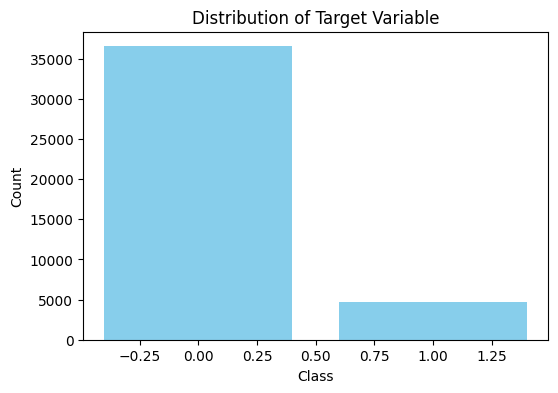

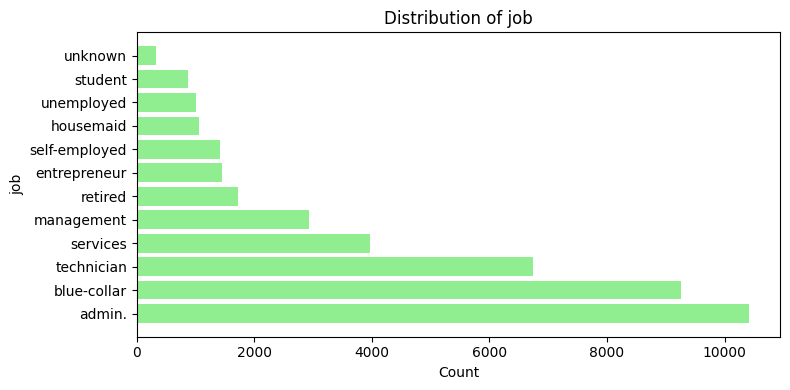

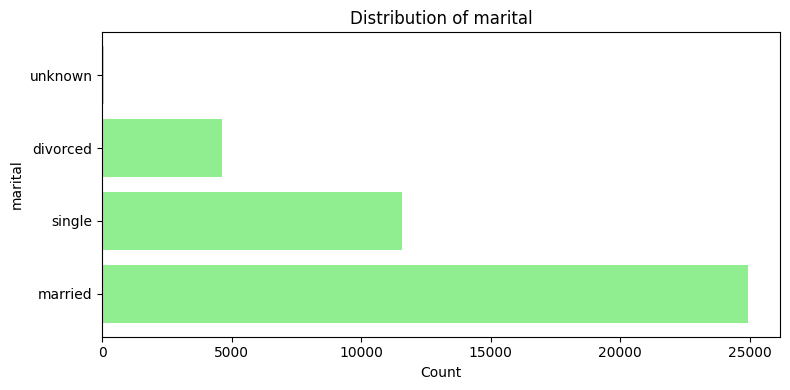

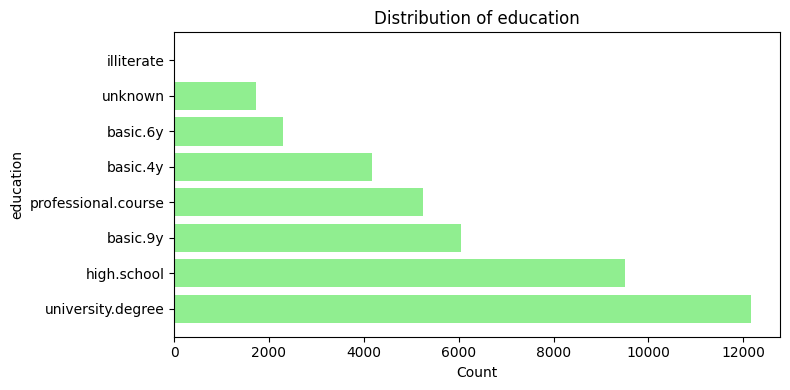

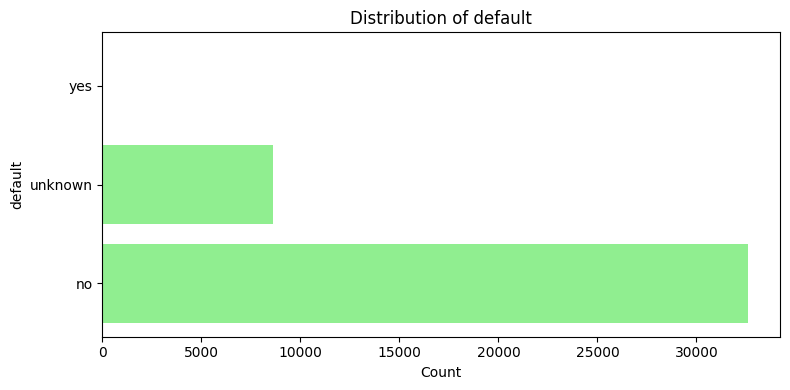

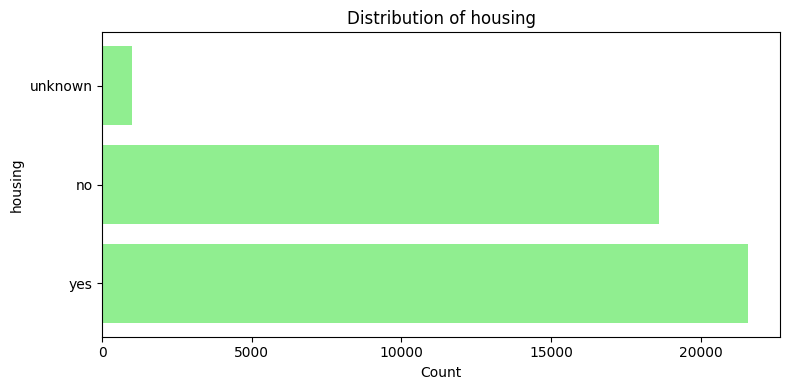

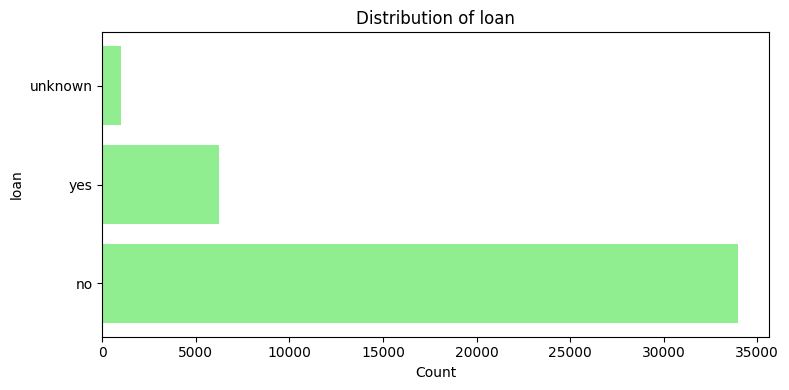

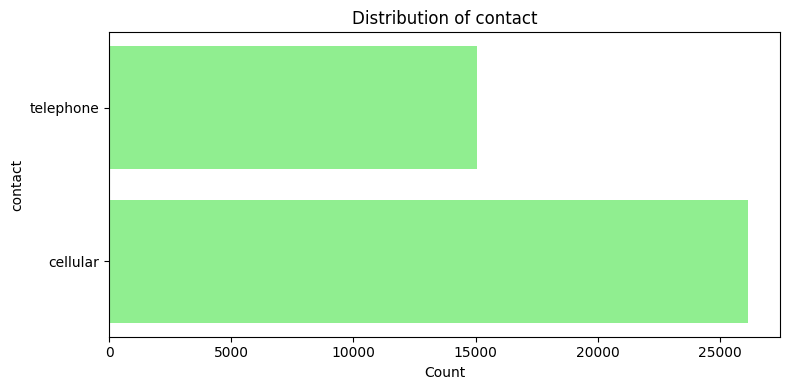

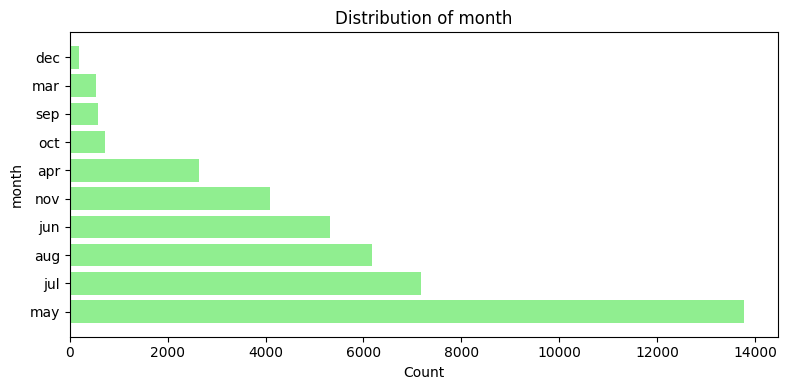

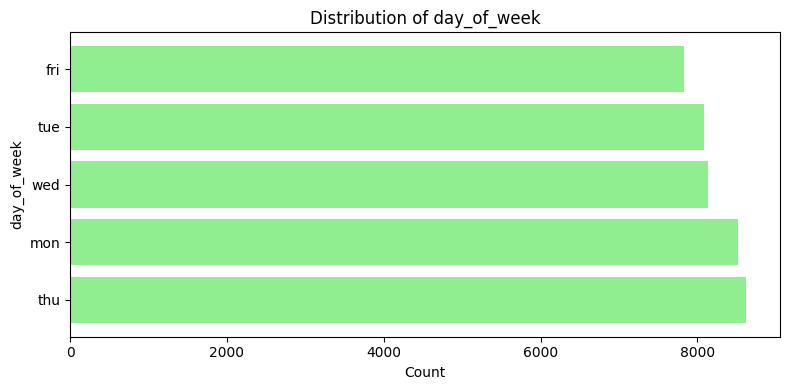

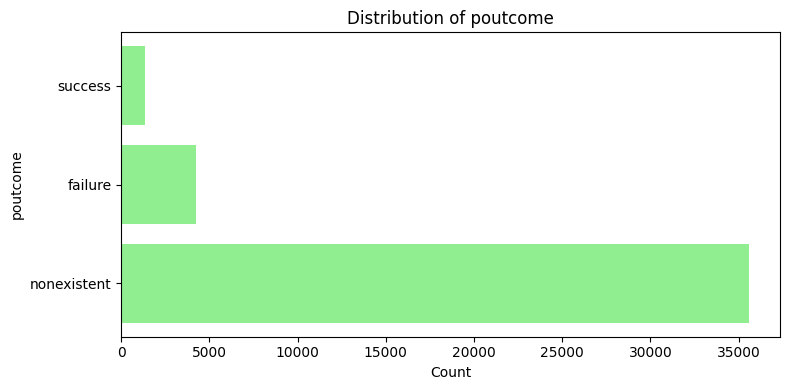

In [3]:
import matplotlib.pyplot as plt

class_counts = df['y'].value_counts()
print("Target class distribution:\n", class_counts)

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    value_counts = df[col].value_counts()
    plt.barh(value_counts.index, value_counts.values, color='lightgreen')
    plt.title(f"Distribution of {col}")
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### Task 2 (Mandatory): Train a decision tree using scikit-learn.

Use max depth = 4 for initial interpretability. Visualize the tree using plot_tree().

**Discuss:** Which features are used at the top levels of the tree? Are they intuitive? 

We trained a Decision Tree (max depth = 4) on the Bank Marketing dataset to predict whether a client will subscribe to a term deposit.
At the top levels of the tree, the most important features are:
nr.employed (number of employees), 
pdays (days since last contact) and
cons.conf.idx (consumer confidence index).
These features make sense: a strong job market and recent contact with the client can make a subscription more likely, and confidence in the economy also plays a role.

The tree structure offers good interpretability while balancing predictive power, helping to uncover actionable insights for targeted marketing.

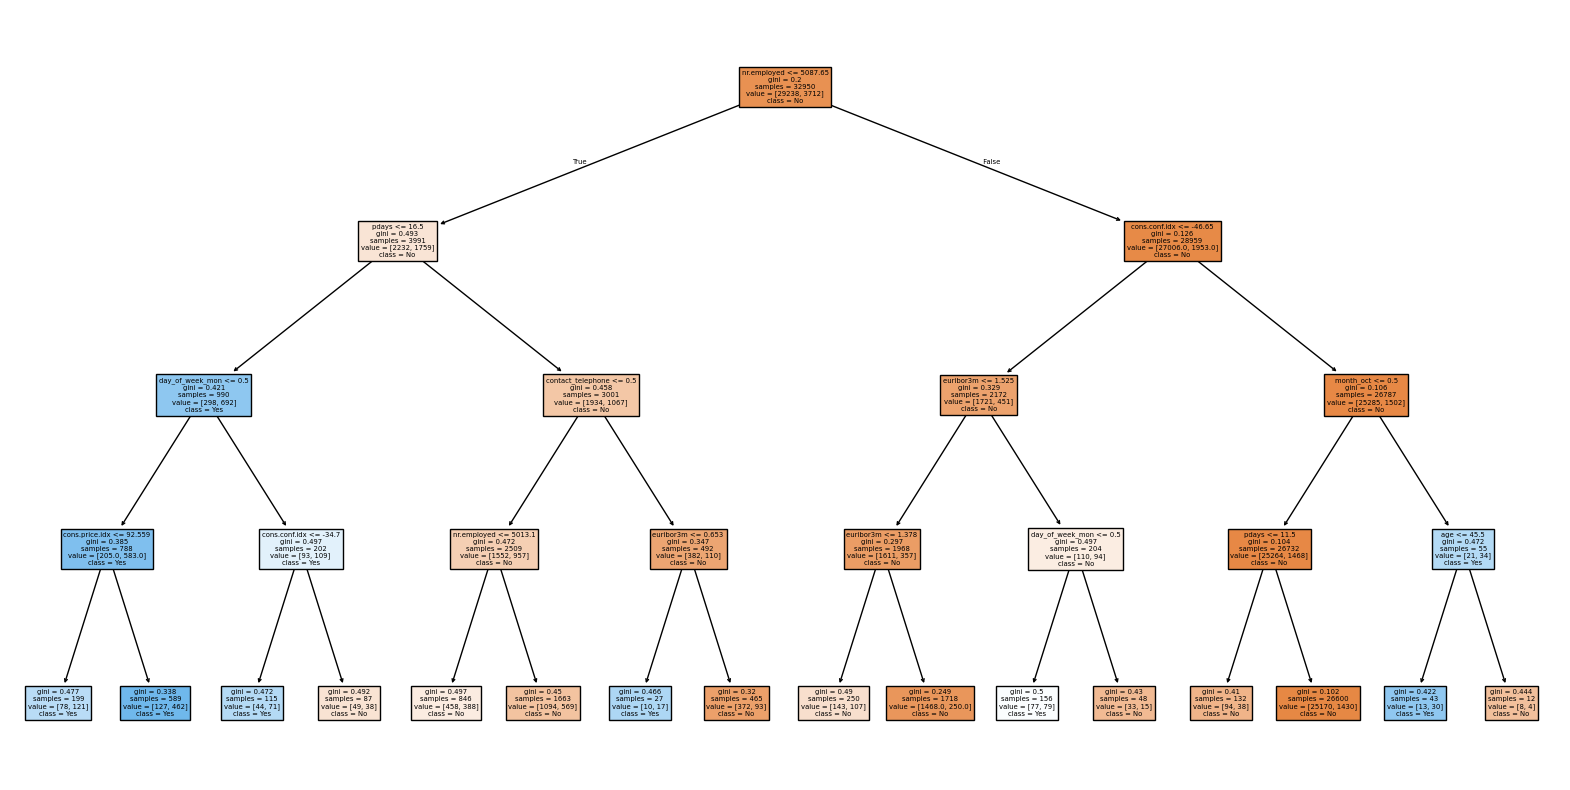

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=4, random_state=8)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=["No", "Yes"], filled=True)
plt.show()


### Task 3 (mandatory): Evaluate Performance and Overfitting
Train the same tree with increasing depths (e.g., 2 to 10). Evaluate on both training and test sets using accuracy and F1 score. Plot Accuracy vs. depth and F1 vs. depth.

**Discuss:** Is there overfitting? Where does performance peak?

Training Accuracy steadily increases with depth which is expected, since deeper trees can memorize training data better.

Test Accuracy:
Peaks around depth 5, then declines slightly.

This suggests that generalization worsens beyond a certain depth.
The gap between train and test accuracy widens after depth 6, a classic sign of overfitting.

**F1 Score Plot Analysis:**

Training F1 Score improves consistently with depth.
Test F1 Score:
Peaks around depth 7, indicating the best balance between precision and recall happens here.
Drops at depth 8, and stabilizes or slightly declines afterward.

This shows overfitting beyond depth 7, as the model becomes too fitted to the training set.

**Overfitting Signs:**

Overfitting occurs when the model performs well on training data but poorly on unseen data.
The widening gap between training and test scores, especially after depth 6–7, is strong evidence of overfitting.
Performance peaks around depth 5–7.
Overfitting starts to appear from depth 8 onward.
For a good trade-off between interpretability and generalization, a depth of 4–6 is optimal.

In [5]:
for depth in range(2, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=8)
    clf.fit(X_train, y_train)
    print(f"Decision Tree Classifier with max depth {depth}:\n")
    print(f"Train Accuracy: {clf.score(X_train, y_train):.4f}")
    print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}\n")

Decision Tree Classifier with max depth 2:

Train Accuracy: 0.8993
Test Accuracy: 0.9002

Decision Tree Classifier with max depth 3:

Train Accuracy: 0.8997
Test Accuracy: 0.9007

Decision Tree Classifier with max depth 4:

Train Accuracy: 0.9004
Test Accuracy: 0.8997

Decision Tree Classifier with max depth 5:

Train Accuracy: 0.9027
Test Accuracy: 0.9022

Decision Tree Classifier with max depth 6:

Train Accuracy: 0.9049
Test Accuracy: 0.9019

Decision Tree Classifier with max depth 7:

Train Accuracy: 0.9078
Test Accuracy: 0.9017

Decision Tree Classifier with max depth 8:

Train Accuracy: 0.9104
Test Accuracy: 0.8995

Decision Tree Classifier with max depth 9:

Train Accuracy: 0.9137
Test Accuracy: 0.8997

Decision Tree Classifier with max depth 10:

Train Accuracy: 0.9180
Test Accuracy: 0.8986



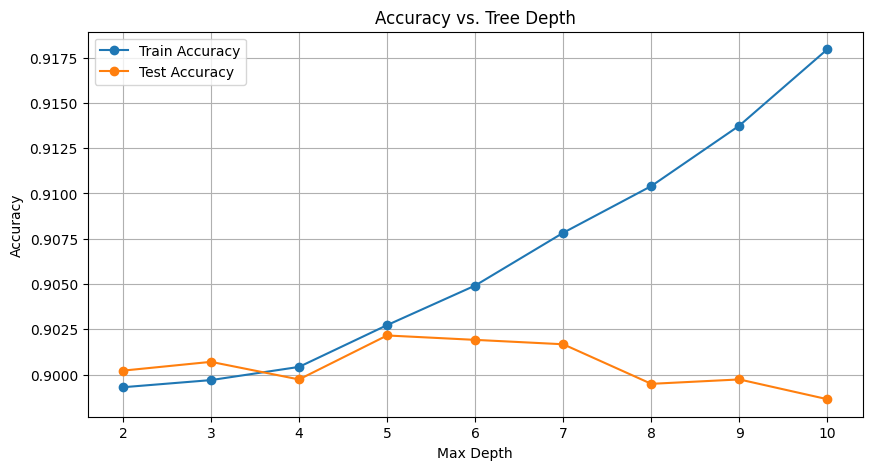

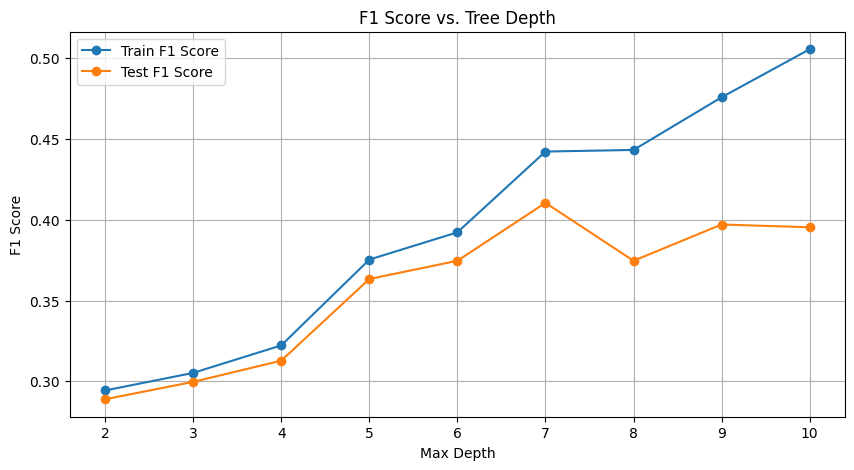

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

depths = range(2, 11)
train_accuracies = []
test_accuracies = []
train_f1s = []
test_f1s = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=8)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    train_f1s.append(f1_score(y_train, y_train_pred))
    test_f1s.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1s, marker='o', label='Train F1 Score')
plt.plot(depths, test_f1s, marker='o', label='Test F1 Score')
plt.title('F1 Score vs. Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


### Task 4 (Mandatory): Train and Compare Ensembles
Train a Random Forest and a Gradient Boosting model.
Tune hyperparameters using grid search (e.g., max_depth, n_estimators).
Do a plot comparing the ROC curves of the three models (Tree, RF, GB).

**Discuss:** Which model performs best and why?

In this task, three classifiers: Decision Tree, Random Forest, and Gradient Boosting were trained to predict the target variable. Hyperparameters for the  models were tuned using grid search. ROC curve analysis showed that the Random Forest model performed best (AUC = 0.806), likely due to its robustness through ensembling, followed closely by Gradient Boosting.

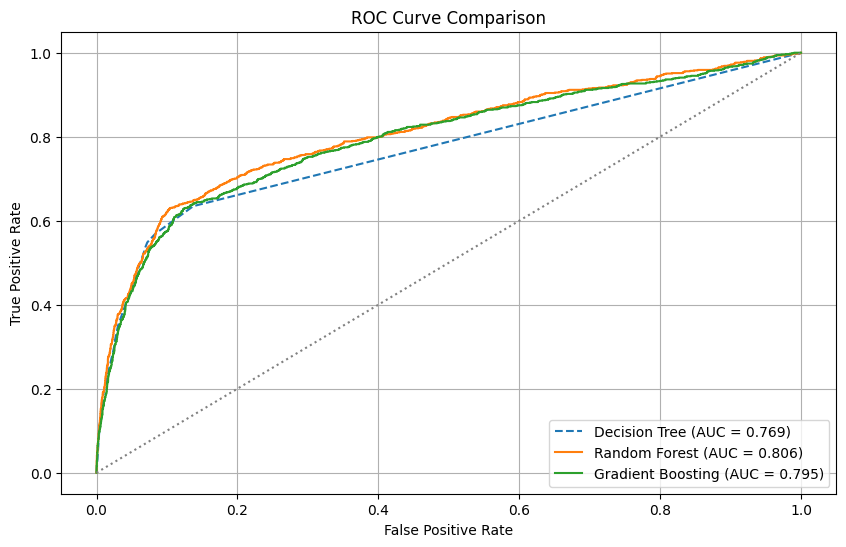

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 150]
}

rf = RandomForestClassifier(random_state=8)
gb = GradientBoostingClassifier(random_state=8)

rf_grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
gb_grid = GridSearchCV(gb, param_grid, scoring='f1', cv=3, n_jobs=-1)

rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
gb_best = gb_grid.best_estimator_

dt = DecisionTreeClassifier(max_depth=4, random_state=8)
dt.fit(X_train, y_train)

y_score_dt = dt.predict_proba(X_test)[:, 1]
y_score_rf = rf_best.predict_proba(X_test)[:, 1]
y_score_gb = gb_best.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Task 5 (Non-Mandatory): Feature Importance Analysis

Extract and plot feature importances for the ensemble models.

Plot the top 10 features by importance (bar chart).

**Discuss:** Are these the same features that dominated the decision tree?

The top 10 features for the models are mostly similar.

In the Random Forest, the most important feature is euribor3m (3-month Eurobor rate), followed by nr.employed, pdays, and poutcome_success.
In the Gradient Boosting model, nr.employed is the most important, followed by age, euribor3m, and pdays.
In the decision tree these features were at the top of the tree: 
nr.employed (number of employees), 
pdays (days since last contact) and
cons.conf.idx (consumer confidence index).

Overall, all three models agree on the importance of economic indicators, especially 
nr.employed, along with contact-related features like pdays.

While cons.conf.idx was important in the Decision Tree, it did not appear as highly ranked in the top 4 of the ensemble models, probably because the tree is shallower and interprets splits differently.

So, while the exact rankings differ, the same types of features tend to be important across models.


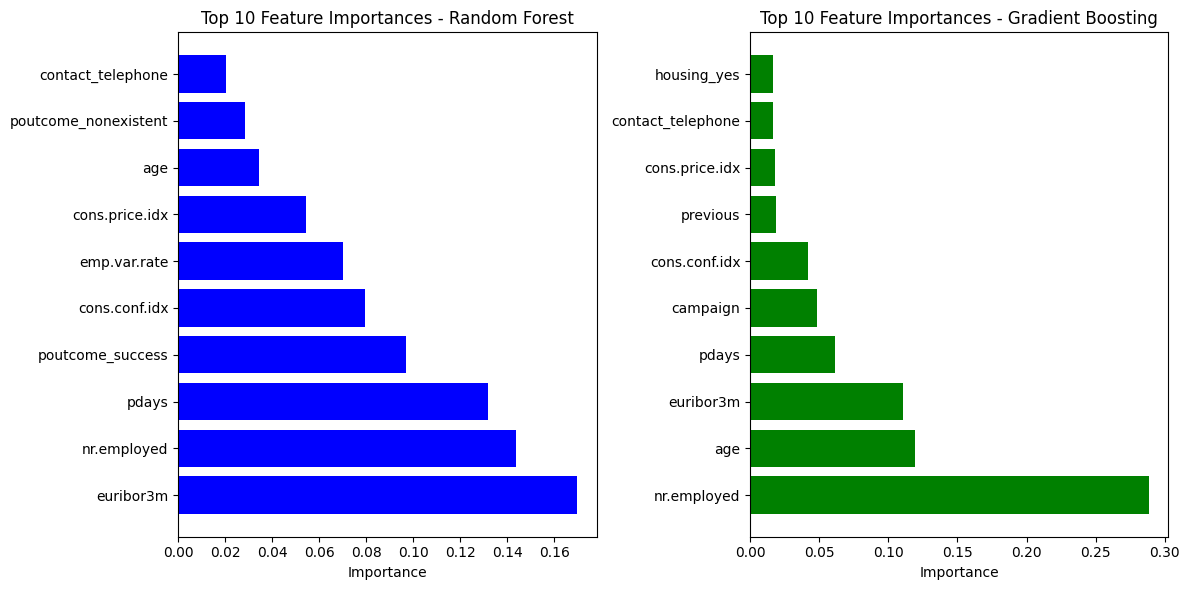

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = rf_best.feature_importances_
gb_importances = gb_best.feature_importances_

rf_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False).head(10)

gb_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(rf_feat_imp['Feature'], rf_feat_imp['Importance'], color='blue')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.subplot(1, 2, 2)
plt.barh(gb_feat_imp['Feature'], gb_feat_imp['Importance'], color='green')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


### Task 6 (Non-Mandatory): Test Model Robustness to Noisy Features

Add synthetic noise features to the dataset. 
Generate 5–10 random columns with values sampled from a uniform or normal distribution.
Concatenate them with the original feature set.
Retrain your Random Forest and Gradient Boosting with the noisy features included.
Evaluate their performance on the test set.

Create a Bar plot comparing test set accuracy or F1 score before adding noise and after adding noise. 

**Discuss:** Did model performance degrade? Why or why not?

What does this tell you about the model’s ability to ignore irrelevant features?

Would feature selection or regularization help in this case?

Interestingly, model performance did not degrade with the addition of noise, in fact, it slightly improved. This suggests that both Random Forest and Gradient Boosting are capable of ignoring irrelevant features through their internal mechanisms. The slight improvement may be due to a regularization-like effect introduced by the noise, helping the models generalize better. In more complex settings or with less robust models, feature selection or regularization could still be beneficial.


In [10]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf_best.predict(X_test)
y_pred_gb = gb_best.predict(X_test)

rf_accuracy_original = accuracy_score(y_test, y_pred_rf)
gb_accuracy_original = accuracy_score(y_test, y_pred_gb)

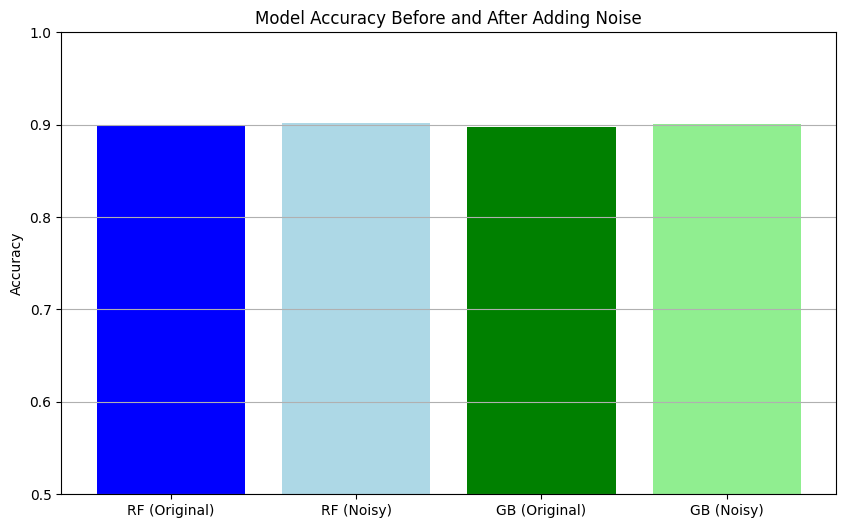

In [12]:
import numpy as np
import matplotlib.pyplot as plt

num_noise_features = 10
noise_data = np.random.randn(X_train.shape[0], num_noise_features)
noise_columns = [f'noise_feature_{i+1}' for i in range(num_noise_features)]
X_train_noisy = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(noise_data, columns=noise_columns)], axis=1)
X_test_noisy = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(np.random.rand(X_test.shape[0], num_noise_features), columns=noise_columns)], axis=1)

rf_noisy = RandomForestClassifier(random_state=8)
rf_noisy.fit(X_train_noisy, y_train)
gb_noisy = GradientBoostingClassifier(random_state=8)
gb_noisy.fit(X_train_noisy, y_train)

y_pred_rf_noisy = rf_noisy.predict(X_test_noisy)
y_pred_gb_noisy = gb_noisy.predict(X_test_noisy)

rf_accuracy_noisy = accuracy_score(y_test, y_pred_rf_noisy)
gb_accuracy_noisy = accuracy_score(y_test, y_pred_gb_noisy)

labels = ['RF (Original)', 'RF (Noisy)', 'GB (Original)', 'GB (Noisy)']
accuracies = [rf_accuracy_original, rf_accuracy_noisy, gb_accuracy_original, gb_accuracy_noisy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'lightblue', 'green', 'lightgreen'])
plt.title('Model Accuracy Before and After Adding Noise')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.grid(axis='y')
plt.show()


## Lecture 7 - Kernels, Maximal Margin Classifiers

### Task 1 (Mandatory): Data Exploration and Preprocessing

Load the dataset using sklearn.datasets.load_breast_cancer().

Standardize the features using StandardScaler.
Use pairplot or PCA to project to 2D and show class separation.

**Discuss:** Do the two classes appear linearly separable?
 
The PCA projection of the breast cancer dataset shows that the two classes (malignant vs. benign) are fairly well separated in the 2D space of the first two principal components.

While not perfectly linearly separable, a simple linear classifier would likely perform well on this dataset.

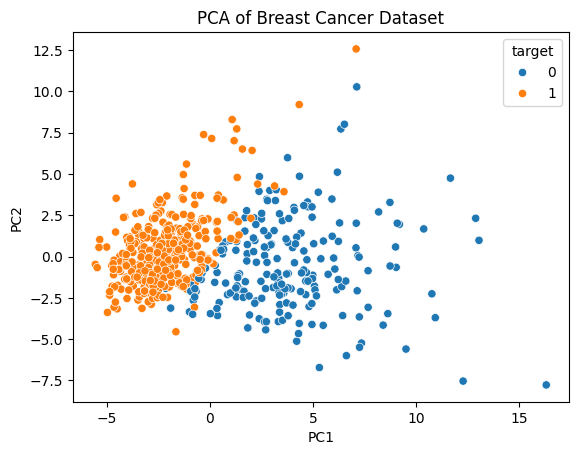

In [13]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns

dataset =  sklearn.datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df_cancer['target'] = dataset.target

scaler = StandardScaler()
X_cancer = scaler.fit_transform(df_cancer.drop('target', axis=1))
pca = PCA(n_components=2)
X_cancer_pca = pca.fit_transform(X_cancer)
df_cancer_pca = pd.DataFrame(data=X_cancer_pca, columns=['PC1', 'PC2'])
df_cancer_pca['target'] = df_cancer['target']
sns.scatterplot(data=df_cancer_pca, x='PC1', y='PC2', hue='target')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer_pca, df_cancer['target'], test_size=0.2, random_state=42, stratify=df_cancer['target']
)

### Task 2 (Mandatory): Train Linear and RBF SVMs

Train two SVM classifiers: one with a linear kernel and one with an RBF kernel.

Use a fixed C=1.0, and for RBF, use default gamma='scale'.

Plot the confusion matrices or classification reports for both models.

**Discuss:** Which kernel performed better? Why might that be?

The linear kernel performed slightly better.
Because the data is fairly well linearly separable, making the linear kernel more effective and simpler than the RBF kernel, which may slightly overfit or introduce unnecessary complexity. Linear SVM showed higher accuracy and fewer malignant misclassifications.

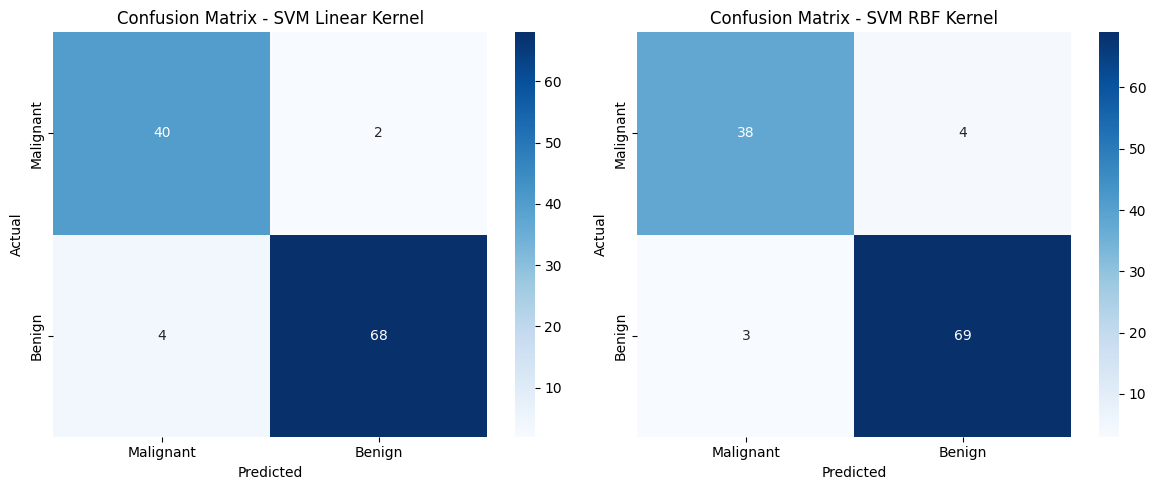

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_rbf = SVC(kernel='rbf', C = 1.0, gamma='scale', random_state=42)
svm_linear.fit(X_cancer_train, y_cancer_train)
svm_rbf.fit(X_cancer_train, y_cancer_train)

y_pred_linear = svm_linear.predict(X_cancer_test)
y_pred_rbf = svm_rbf.predict(X_cancer_test)
cm_linear = confusion_matrix(y_cancer_test, y_pred_linear)
cm_rbf = confusion_matrix(y_cancer_test, y_pred_rbf)
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - SVM Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - SVM RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Task 3 (Mandatory): Hyperparameter Tuning

Use grid search with cross-validation to find optimal values of C and gamma for the RBF kernel.

Plot a heatmap of validation accuracy or F1 score for the grid.

**Discuss:** What combination of hyperparameters gave the best results?

From the heatmap, the best F1 score (≈ 0.965) was achieved using:

C = 100
Gamma = 0.001

This combination gave the highest validation performance among all tested pairs.
The model likely benefited from this balance of complexity and flexibility, capturing the patterns in the data without overfitting. Lower values of C didn’t allow the model enough complexity to perform as well.



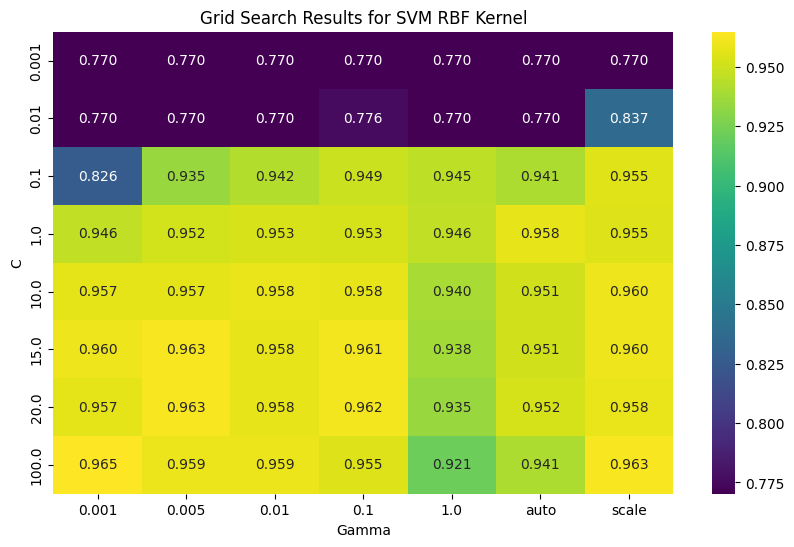

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 15.0, 20.0, 100.0],
    'gamma': ['scale', 'auto', 0.001, 0.005, 0.01, 0.1, 1.0]
}
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid_svm, scoring='f1', cv=5, n_jobs=-1)
grid_search_svm.fit(X_cancer_train, y_cancer_train)
results = pd.DataFrame(grid_search_svm.cv_results_)
heatmap_data = results.pivot_table(index='param_C', columns='param_gamma', values='mean_test_score')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f')
plt.title('Grid Search Results for SVM RBF Kernel')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

### Task 4 (non-mandatory): Investigate the Effect of the Regularization Parameter C

Train RBF SVM models for a wide range of C values (e.g., 0.001, 0.01, 0.1, 1, 10, 100), keeping gamma fixed.

For each model, record training and test accuracy or F1 score.

Plot the training and test scores vs. C (line plot).

**Discuss:**

- What happens when C is very small or very large?

- What does this tell you about the role of C in the SVM objective?

At C = 0.001 or 0.01, both training and test accuracy are low.

This is because a small C heavily penalizes large weights, causing the SVM to favor a wide margin, even if it misclassifies some points.

The result is underfitting—the model is too simple to capture patterns in the data.

As C increases (10 or 100), training accuracy goes up and becomes nearly perfect.

Test accuracy slightly drops at very high C (from 10 to 100).

This suggests overfitting: the model tries too hard to classify training data perfectly, which may hurt generalization.

C controls the trade-off between margin size and classification errors.

Small C - larger margin, more tolerant to misclassifications - simpler model.

Large C - smaller margin, less tolerant to errors - complex model, risk of overfitting.

An intermediate C (like 0.1 or 1) gave the best test performance, striking a good balance. 

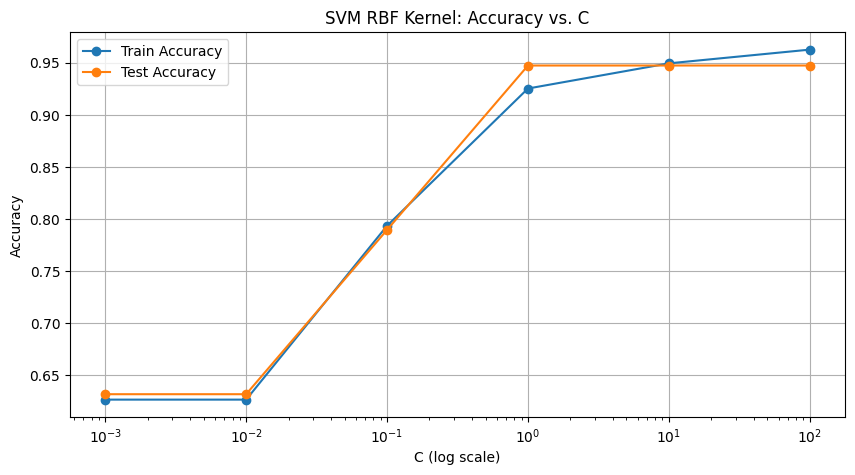

In [16]:
train_scores = []
test_scores = []
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm_rbf_c = SVC(kernel='rbf', C=c, gamma= 0.001, random_state=42)
    svm_rbf_c.fit(X_cancer_train, y_cancer_train)
    
    train_score = svm_rbf_c.score(X_cancer_train, y_cancer_train)
    test_score = svm_rbf_c.score(X_cancer_test, y_cancer_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
plt.figure(figsize=(10, 5))
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], train_scores, marker='o', label='Train Accuracy')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], test_scores, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.title('SVM RBF Kernel: Accuracy vs. C')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Task 5 (non-mandatory): Compare SVM with Logistic Regression

Train a logistic regression model on the same (standardized) data.

Compare its performance with your best-performing SVM.

Plot, side-by-side bar plot of accuracy, precision, recall, and F1 score for both models.

**Discuss:**

- Which model performed better overall?

- Were there significant differences in false positives or false negatives?

- Based on your task (e.g., cancer detection), which type of error is more costly?

Both the SBF RBF and Logistic regression models performed relatively similar, based on all the scores.  
Based on the Precision score (tp/(tp+fp)) the logistic regression model performed slightly better, and would be preferred in real life scenarios  
where false-negatives cost more than false-positives

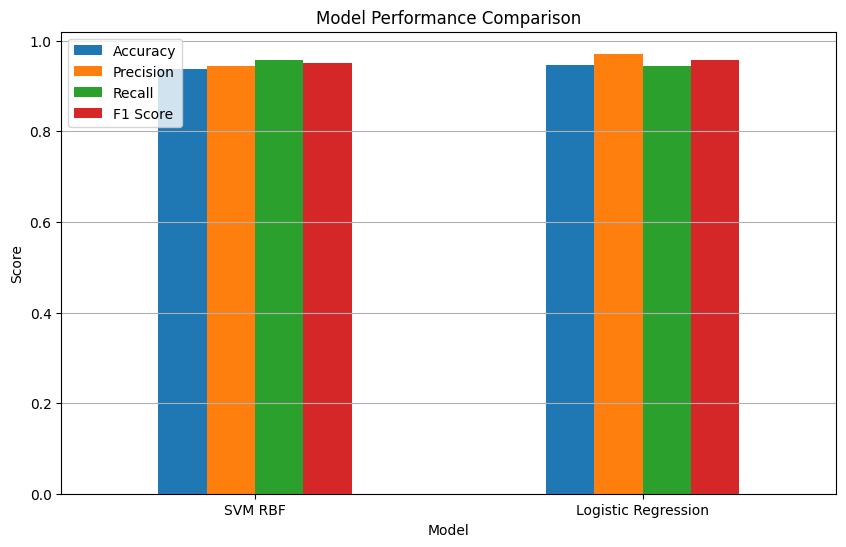

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_cancer_train, y_cancer_train)
y_pred_log_reg = log_reg.predict(X_cancer_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {
    'Model': ['SVM RBF', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_cancer_test, y_pred_rbf), accuracy_score(y_cancer_test, y_pred_log_reg)],
    'Precision': [precision_score(y_cancer_test, y_pred_rbf), precision_score(y_cancer_test, y_pred_log_reg)],
    'Recall': [recall_score(y_cancer_test, y_pred_rbf), recall_score(y_cancer_test, y_pred_log_reg)],
    'F1 Score': [f1_score(y_cancer_test, y_pred_rbf), f1_score(y_cancer_test, y_pred_log_reg)]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()


## Lecture 8 - Clustering (All Mandatory)

In this assignment you will implement an unsupervised learning method, then you will test it with data sets of your choice. 

You must deliver the results in a jupyter notebook, combining the code, text, and images in a nice readable sequence.

**Goal:** Implement the clustering algorithm called Bisecting k-Means.
Bisecting k-Means [1] is a clustering algorithm that combines hierarchical clustering with k-Means. However, differently than the hierarchical clustering we saw in the lecture, it uses a divisive, top-down approach (instead of the agglomerative, bottom-up that we are used to). It consists on the steps described below:

1. Start with a single cluster including all the observations in the data set.
2. [Bisecting] Divide the largest cluster into two smaller sub-clusters using k-Means.
3. Redo the bisecting step iter times and choose the best solution according to the Sum of Squared Errors (SSE).
4. Repeat from Step 2 until you have k clusters.

Implement the Bisecting k-Means algorithm in a function called bkmeans. It should take as input: (a) the data X to cluster, as a n × p matrix (n observations by p features); (b) the number k of clusters; and (c) the number iter of iterations for step 3. It should generate as output a n × 1 vector with the cluster indices for each of the n observations.
Notes:
1. You must implement K-Means yourself, from scratch.
2. The requirements are strict. I will use standard test cases in order to test your solution by calling the function
bkmeans as described.

[1] M. Steinbach, G. Karypis, V. Kumar et al., “A comparison of document clustering techniques,” in
KDD workshop on text mining, vol. 400, no. 1. Boston, 2000, pp. 525–526. [Online]. Available:
http://glaros.dtc.umn.edu/gkhome/fetch/papers/docclusterKDDTMW00.pdf

In [ ]:
import numpy as np

def compute_sse(X, labels, centroids):
    sse = 0.0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        sse += np.sum((cluster_points - centroids[i])**2)
    return sse

def kmeans(X, num_clusters, max_iter=100):
    n_samples, n_features = X.shape

    if n_samples == 0:
        raise ValueError("Cannot run k-means on an empty dataset.")

    if n_samples < num_clusters:
        labels = np.arange(n_samples)
        centroids = X.copy()
        while len(centroids) < num_clusters:
            centroids = np.vstack([centroids, X.mean(axis=0)])
        return labels, centroids

    rng = np.random.default_rng()
    centroids = X[rng.choice(n_samples, size=num_clusters, replace=False)]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(num_clusters)
        ])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

def bkmeans(X, k, iter):
    n_samples = X.shape[0]
    cluster_assignments = np.zeros(n_samples, dtype=int)
    clusters = {0: X}
    cluster_id = 1

    while len(clusters) < k:
        largest_cluster_id = max(clusters, key=lambda cid: len(clusters[cid]))
        largest_cluster_data = clusters[largest_cluster_id]
        if len(largest_cluster_data) <= 1:
            break
        best_sse = float('inf')
        best_labels = None
        best_centroids = None

        for _ in range(iter):
            labels, centroids = kmeans(largest_cluster_data, 2)
            sse = compute_sse(largest_cluster_data, labels, centroids)
            if sse < best_sse:
                best_sse = sse
                best_labels = labels
                best_centroids = centroids

        mask = (cluster_assignments == largest_cluster_id)
        cluster_assignments[mask] = -1

        new_ids = [largest_cluster_id, cluster_id]
        for i in range(2):
            idx = np.where(mask)[0][best_labels == i]
            cluster_assignments[idx] = new_ids[i]
            clusters[new_ids[i]] = X[cluster_assignments == new_ids[i]]

        del clusters[largest_cluster_id]
        cluster_id += 1

    return cluster_assignments


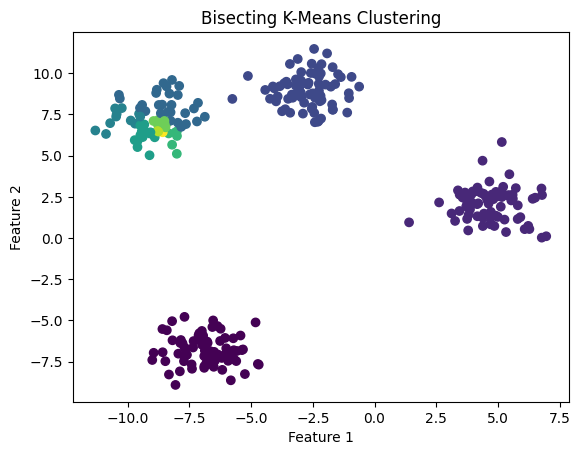

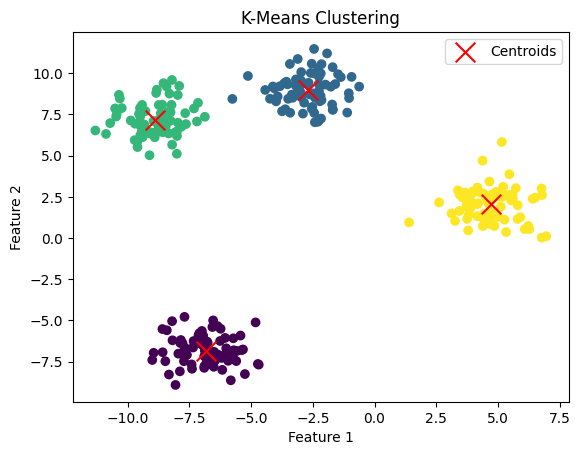

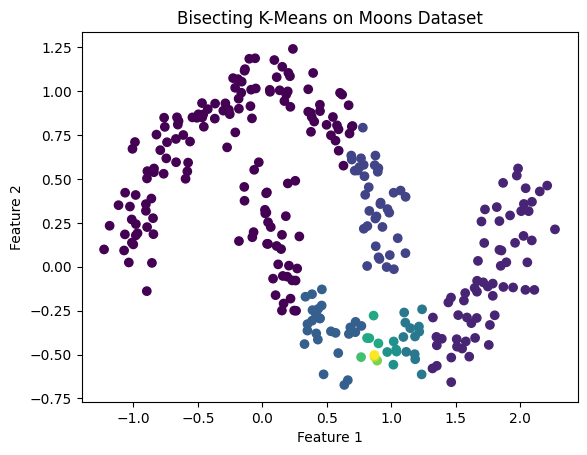

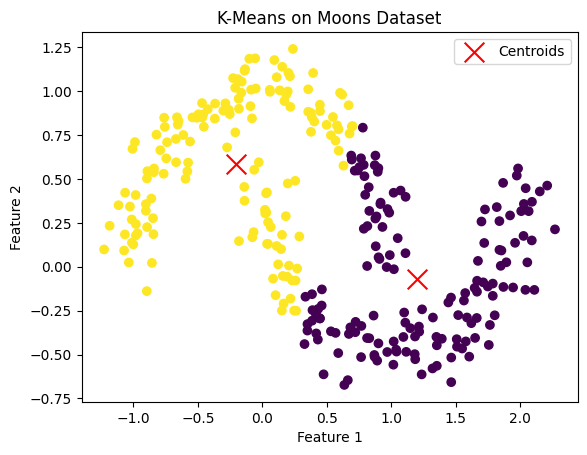

In [21]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
labels = bkmeans(X, k=4, iter=10)
labels_kmeans, centroids = kmeans(X, num_clusters=4)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Bisecting K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
from sklearn.datasets import make_moons
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
labels_kmeans_moons, centroids_moons = kmeans(X_moons, num_clusters=2)
labels_moons = bkmeans(X_moons, k=2, iter=10)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', marker='o')
plt.title('Bisecting K-Means on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, cmap='viridis', marker='o')
plt.scatter(centroids_moons[:, 0], centroids_moons[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title('K-Means on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Lecture 9 - Dimensionality Reduction 

### Task 1 (mandatory)

In this exercise you will visualize and explore the results of the previous exercise in a simple manner, using scatterplots.
This will be a relatively open-ended task; you will choose three data sets and explore them with the new technique you built for yourself. 

These could be data sets you already used in previous assignments, or you could download some
new data. The only restrictions are that (a) the data sets must be multidimensional (i.e., more than 4 features), (b) they must have labels, and (c) they must have at least 1000 data points.

These are some examples of interesting places to obtain new data sets:

* http://archive.ics.uci.edu/ml/index.php
* https://www.openml.org/search?type=data
* https://www.kaggle.com/datasets

Be careful, however, with the size of the data set you choose. Python can get quite slow with too much data, and the scatterplots will also be very crowded, so go for smaller data sets this time.

**Important**: Download the datasets and put them under the folder *datasets* so that we can run your code.

In [ ]:

from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

In [27]:
import numpy as np
import pandas as pd

X_train = np.loadtxt(f"datasets/your_datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt(f"datasets/your_datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt").astype(int)

X_test = np.loadtxt(f"datasets/your_datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt(f"datasets/your_datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt").astype(int)

X_har = np.vstack((X_train, X_test))
y_har = np.hstack((y_train, y_test))


In [ ]:
activity_labels = pd.read_csv("datasets/your_datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", sep=" ", header=None, index_col=0)
activity_names = y_har.copy()
activity_names = pd.Series(activity_names).map(activity_labels[1])


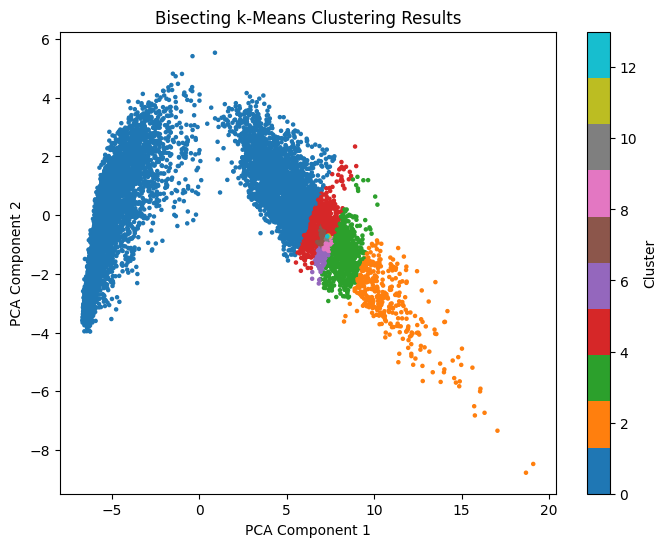

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_reduced = PCA(n_components=2).fit_transform(X_har)
cluster_assignments = bkmeans(X_reduced, k=6, iter=100)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_assignments, cmap='tab10', s=5)
plt.title("Bisecting k-Means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 
           'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

df_letter = pd.read_csv("datasets\your_datasets\letter+recognition\letter-recognition.data", header=None, names=columns)

X_letter = df_letter.drop('letter', axis=1).values
y_letter = df_letter['letter'].values


In [30]:
X, y = fetch_openml('Fashion-MNIST', version=1, as_frame=False, return_X_y=True)

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

k = len(np.unique(y))
cluster_labels = bkmeans(X_scaled, k, iter=10)
from sklearn.decomposition import PCA
X_2d = PCA(n_components=2).fit_transform(X_scaled)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', s=10)
plt.title("Ground Truth Labels")

plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title("Bisecting k-Means Clusters")

plt.show()


KeyboardInterrupt: 

### Task 2 (non-mandatory) - Comparison of DR Techniques

Generate a scatterplot matrix comparing the results of three DR techniques: PCA, MDS, and t-SNE, for each data set chosen in the previous exercise. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a DR technique applied to a data set. 
Color the points by their target variables (i.e., class/labels) using a qualitative colormap.

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which technique performed the best for each data set, regarding the separation of the classes? 
- How are the classes in the data sets separated? 
- Are some classes easier to separate than others?


### Task 3 (non-mandatory): Comparison of Clustering Techniques

Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g., https://matplotlib.org/tutorials/colors/colormaps.html).

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which clustering technique performed the best for each data set? 
- How are the clusters in the data sets separated? 
- Are some clusters easier to separate than others?